In [32]:
!pip install pandas matplotlib scikit-learn xgboost joblib tqdm

In [33]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import numpy as np
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # Show all columns
# Set seaborn theme
sns.set_theme(style='whitegrid')

In [34]:
df = pd.read_csv('sisam_focos_2003.csv')
df.head(10)

,datahora,longitude,latitude,co_ppb,no2_ppb,o3_ppb,pm25_ugm3,so2_ugm3,precipitacao_mmdia,temperatura_c,umidade_relativa_percentual,vento_direcao_grau,vento_velocidade_ms,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp,time_diff_hours,incendio
0,2003-01-01,-67.0527,-10.0759,147.5,0.3,3.7,13.7,0.1,4.0,25.7,96,10,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2003-01-01,-69.5672,-10.9409,138.3,0.0,6.9,12.2,0.0,0.0,24.5,95,339,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2003-01-01,-68.7488,-11.0010,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2003-01-01,-67.9521,-9.8310,134.3,0.2,6.5,11.9,0.1,4.0,25.6,95,346,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2003-01-01,-67.6760,-10.5741,138.3,0.2,6.6,12.3,0.1,1.0,25.8,92,341,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2003-01-01,-72.6704,-7.6308,139.4,0.1,4.9,12.8,0.0,4.0,26.1,90,105,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2003-01-01,-68.7412,-11.0289,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2003-01-01,-70.3540,-8.1649,138.9,0.2,4.3,12.9,0.0,0.0,26.2,90,109,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2003-01-01,-71.9481,-9.1911,141.2,0.0,5.7,14.5,0.0,15.0,25.6,92,346,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2003-01-01,-72.9053,-7.6146,139.4,0.1,4.9,13.0,0.0,4.0,26.0,90,97,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [35]:
# Resumo de informações úteis do dataframe (principalmente contagem de elementos não-nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135120 entries, 0 to 8135119
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   datahora                     object 
 1   longitude                    float64
 2   latitude                     float64
 3   co_ppb                       float64
 4   no2_ppb                      float64
 5   o3_ppb                       float64
 6   pm25_ugm3                    float64
 7   so2_ugm3                     float64
 8   precipitacao_mmdia           float64
 9   temperatura_c                float64
 10  umidade_relativa_percentual  int64  
 11  vento_direcao_grau           int64  
 12  vento_velocidade_ms          float64
 13  data_pas                     object 
 14  satelite                     object 
 15  pais                         object 
 16  estado                       object 
 17  municipio                    object 
 18  bioma                        object 
 19  

In [36]:
df = df.drop(columns=["data_pas", "satelite", "pais", "estado", "municipio", "bioma", "numero_dias_sem_chuva", "precipitacao", "risco_fogo", "id_area_industrial", "frp", "time_diff_hours"])
df = df.dropna()
print(len(df))
df.head(10)

2032728


,datahora,longitude,latitude,co_ppb,no2_ppb,o3_ppb,pm25_ugm3,so2_ugm3,precipitacao_mmdia,temperatura_c,umidade_relativa_percentual,vento_direcao_grau,vento_velocidade_ms,incendio
0,2003-01-01,-67.0527,-10.0759,147.5,0.3,3.7,13.7,0.1,4.0,25.7,96,10,1.3,0
1,2003-01-01,-69.5672,-10.9409,138.3,0.0,6.9,12.2,0.0,0.0,24.5,95,339,1.3,0
2,2003-01-01,-68.7488,-11.0010,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,0
3,2003-01-01,-67.9521,-9.8310,134.3,0.2,6.5,11.9,0.1,4.0,25.6,95,346,1.4,0
4,2003-01-01,-67.6760,-10.5741,138.3,0.2,6.6,12.3,0.1,1.0,25.8,92,341,1.2,0
5,2003-01-01,-72.6704,-7.6308,139.4,0.1,4.9,12.8,0.0,4.0,26.1,90,105,0.5,0
6,2003-01-01,-68.7412,-11.0289,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,0
7,2003-01-01,-70.3540,-8.1649,138.9,0.2,4.3,12.9,0.0,0.0,26.2,90,109,0.3,0
8,2003-01-01,-71.9481,-9.1911,141.2,0.0,5.7,14.5,0.0,15.0,25.6,92,346,1.2,0
9,2003-01-01,-72.9053,-7.6146,139.4,0.1,4.9,13.0,0.0,4.0,26.0,90,97,0.5,0


In [37]:
class ProgressMonitor:
    def __init__(self, total_folds):
        self.pbar = tqdm(total=total_folds, desc="Folds completos", unit="fold")

    def update(self, fold, mse, r2):
        self.pbar.set_postfix({
            'Fold': f"{fold+1}/{self.pbar.total}",
            'MSE': f"{mse:.4f}",
            'R²': f"{r2:.4f}"
        })
        self.pbar.update(1)

In [38]:
#Função que aplica o k-fold trainer
def kfold_with_progress(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores, r2_scores = [], []
    monitor = ProgressMonitor(n_splits)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Barra de progresso para o treino
        with tqdm(total=100, desc=f"Treino Fold {fold+1}", leave=False) as pbar_train:
            model.fit(X_train, y_train)
            for i in range(100):
                pbar_train.update(1)  # Simula progresso

        #Calcular tempo total de predição
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        monitor.update(fold, mse, r2)

    monitor.pbar.close()
    return np.mean(mse_scores), np.std(mse_scores), np.mean(r2_scores), np.std(r2_scores)

In [74]:
#Selecionar uma amostra aleatória do dataset para treino e teste
df_sample = df.sample(n=250000, random_state=42)

# Separação entre X e y
X = df_sample.drop(columns=['incendio'])

# Remove colunas de ID
X = X.drop(columns=["datahora", "longitude", "latitude"])

y = df_sample['incendio']

In [75]:
#Para KFold
k_values = [3, 5]

# SVR e MLP precisam de scaling de dados
mlp = make_pipeline(StandardScaler(), MLPRegressor(max_iter=200, hidden_layer_sizes=(100,100), random_state=42))

models = [
    RandomForestRegressor(random_state=42),
    mlp,
    xg.XGBRegressor(objective='reg:squarederror',n_estimators=100,seed=123),
]

modelNames = ['RF', 'MLP', 'XGBoost']

results = []
print("Iniciando avaliação de K-Fold\n")
for i in range(len(models)) :
    result = {'mse': {}, 'r2': {}}
    for k in k_values:
        print(f"\n{'='*30} Model = {modelNames[i]} --- K = {k} {'='*30}")
        mse_mean, mse_std, r2_mean, r2_std = kfold_with_progress(models[i], X, y, n_splits=k)
        result['mse'][k] = {'mean': mse_mean, 'std': mse_std}
        result['r2'][k] = {'mean': r2_mean, 'std': r2_std}
        
    results.append(result)
    joblib.dump(models[i], f"{modelNames[i]}.pkl")
    print(f"{'='*30} {modelNames[i]} metrics ({k} folds){'='*30}\nMean Squared Error: {result['mse'][k]['mean']:.2f} --- R²: {result['r2'][k]['mean']*100:.2f}\n\n" )

Iniciando avaliação de K-Fold


============================== Model = RF --- K = 3 ==============================


Folds completos:   0%|          | 0/3 [00:00<?, ?fold/s]

















Folds completos: 100%|██████████| 3/3 [04:58<00:00, 99.55s/fold, Fold=3/3, MSE=0.0759, R²=0.2505] 



============================== Model = RF --- K = 5 ==============================


Folds completos:   0%|          | 0/5 [00:00<?, ?fold/s]





























Folds completos: 100%|██████████| 5/5 [09:59<00:00, 119.93s/fold, Fold=5/5, MSE=0.0762, R²=0.2428]



============================== RF metrics (5 folds)==============================
Mean Squared Error: 0.08 --- R²: 25.40



============================== Model = MLP --- K = 3 ==============================


Folds completos:   0%|          | 0/3 [00:00<?, ?fold/s]

















Folds completos: 100%|██████████| 3/3 [02:19<00:00, 46.52s/fold, Fold=3/3, MSE=0.0743, R²=0.2662]



============================== Model = MLP --- K = 5 ==============================


Folds completos:   0%|          | 0/5 [00:00<?, ?fold/s]





























Folds completos: 100%|██████████| 5/5 [04:03<00:00, 48.66s/fold, Fold=5/5, MSE=0.0741, R²=0.2638]



============================== MLP metrics (5 folds)==============================
Mean Squared Error: 0.07 --- R²: 27.17



============================== Model = XGBoost --- K = 3 ==============================




















Folds completos: 100%|██████████| 3/3 [00:02<00:00,  1.21fold/s, Fold=3/3, MSE=0.0754, R²=0.2558]



============================== Model = XGBoost --- K = 5 ==============================
































Folds completos: 100%|██████████| 5/5 [00:04<00:00,  1.18fold/s, Fold=5/5, MSE=0.0750, R²=0.2543]

============================== XGBoost metrics (5 folds)==============================
Mean Squared Error: 0.07 --- R²: 26.26





Grid Search de Threshold para o modelo: RF
Melhor threshold para RF: 0.50
Acurácia: 0.9800
Precisão: 0.9640
Recall: 0.8570
F1 Score: 0.9074
Matriz de Confusão:
Melhor threshold para RF: 0.50
Acurácia: 0.9800
Precisão: 0.9640
Recall: 0.8570
F1 Score: 0.9074
Matriz de Confusão:


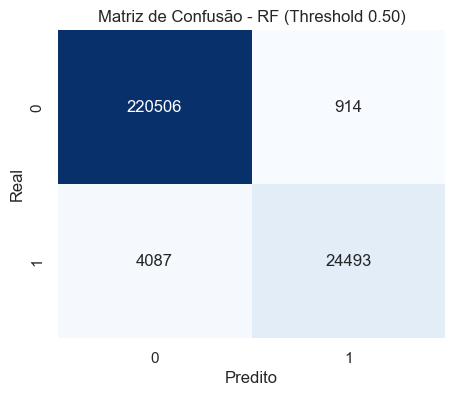

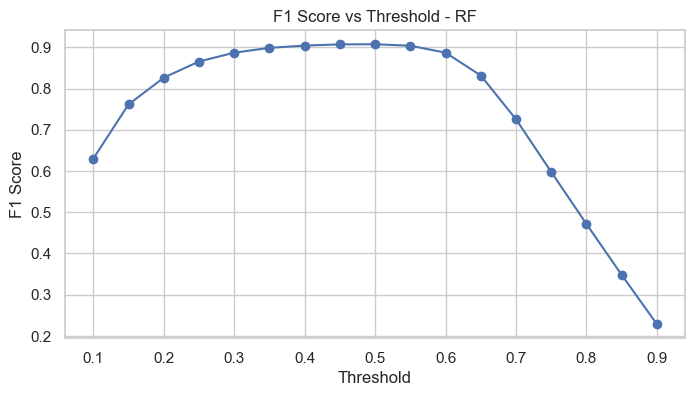


Grid Search de Threshold para o modelo: MLP
Melhor threshold para MLP: 0.30
Acurácia: 0.8939
Precisão: 0.5383
Recall: 0.5024
F1 Score: 0.5197
Matriz de Confusão:
Melhor threshold para MLP: 0.30
Acurácia: 0.8939
Precisão: 0.5383
Recall: 0.5024
F1 Score: 0.5197
Matriz de Confusão:


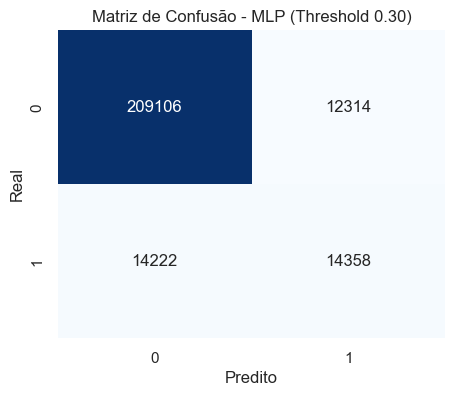

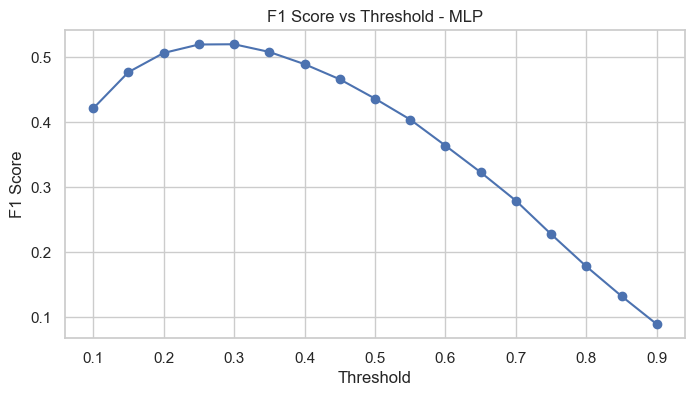


Grid Search de Threshold para o modelo: XGBoost
Melhor threshold para XGBoost: 0.30
Acurácia: 0.9039
Precisão: 0.5876
Recall: 0.5347
F1 Score: 0.5599
Matriz de Confusão:
Melhor threshold para XGBoost: 0.30
Acurácia: 0.9039
Precisão: 0.5876
Recall: 0.5347
F1 Score: 0.5599
Matriz de Confusão:


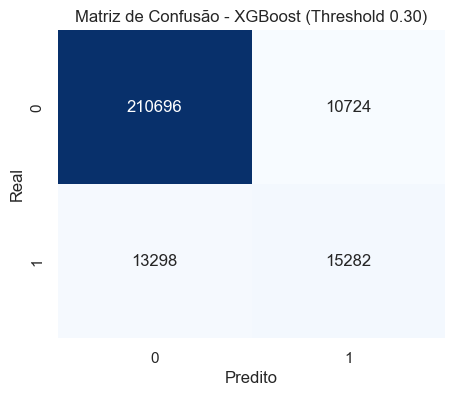

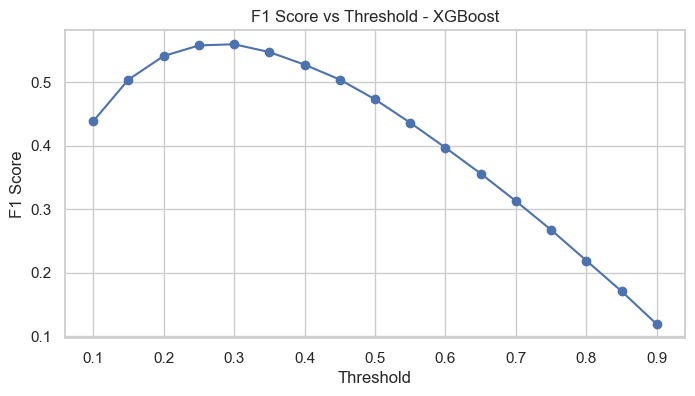

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

thresholds = np.arange(0.1, 0.91, 0.05)

for i, model in enumerate(models):
    print(f"\nGrid Search de Threshold para o modelo: {modelNames[i]}")
    best_f1 = 0
    best_threshold = 0.5
    best_metrics = {}
    f1_scores = []
    for threshold in thresholds:
        y_true = y
        y_pred_prob = model.predict(X)
        y_pred_class = (y_pred_prob >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred_class)
        prec = precision_score(y_true, y_pred_class)
        rec = recall_score(y_true, y_pred_class)
        f1 = f1_score(y_true, y_pred_class)
        f1_scores.append(f1)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_metrics = {
                'acc': acc,
                'prec': prec,
                'rec': rec,
                'f1': f1,
                'cm': confusion_matrix(y_true, y_pred_class)
            }
    print(f"Melhor threshold para {modelNames[i]}: {best_threshold:.2f}")
    print(f"Acurácia: {best_metrics['acc']:.4f}")
    print(f"Precisão: {best_metrics['prec']:.4f}")
    print(f"Recall: {best_metrics['rec']:.4f}")
    print(f"F1 Score: {best_metrics['f1']:.4f}")
    print("Matriz de Confusão:")
    plt.figure(figsize=(5,4))
    sns.heatmap(best_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {modelNames[i]} (Threshold {best_threshold:.2f})')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    
    # Plot F1 score vs threshold
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.title(f'F1 Score vs Threshold - {modelNames[i]}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()


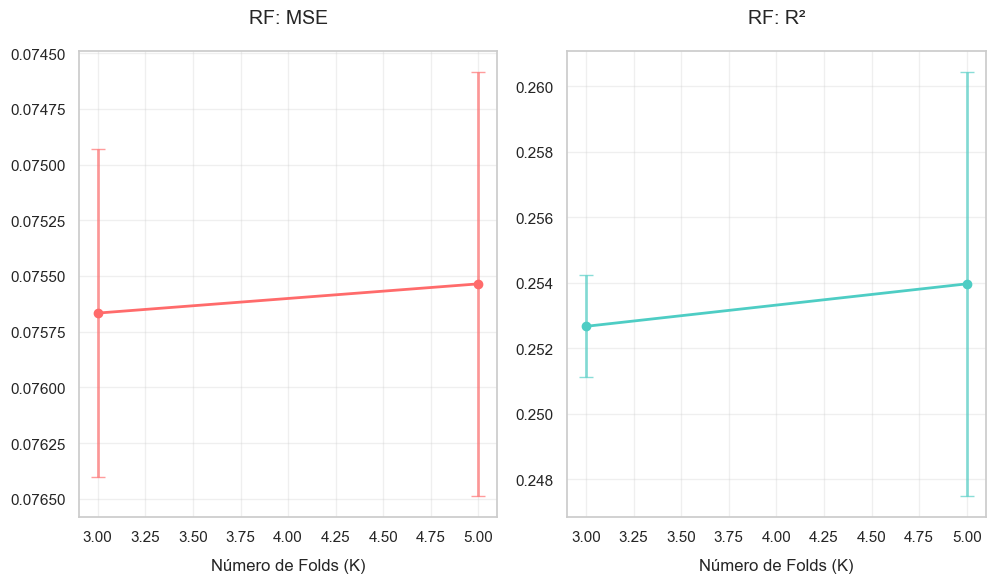

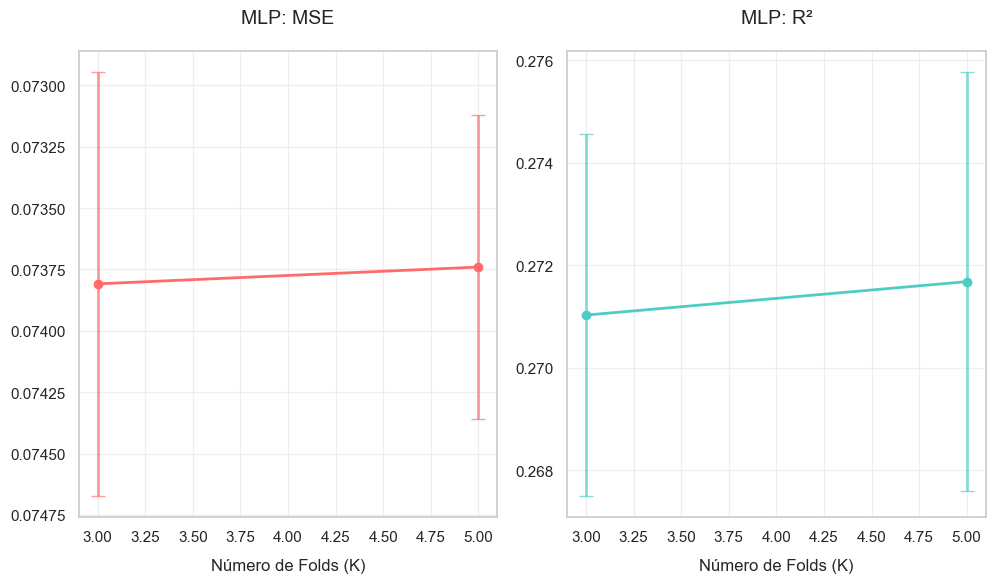

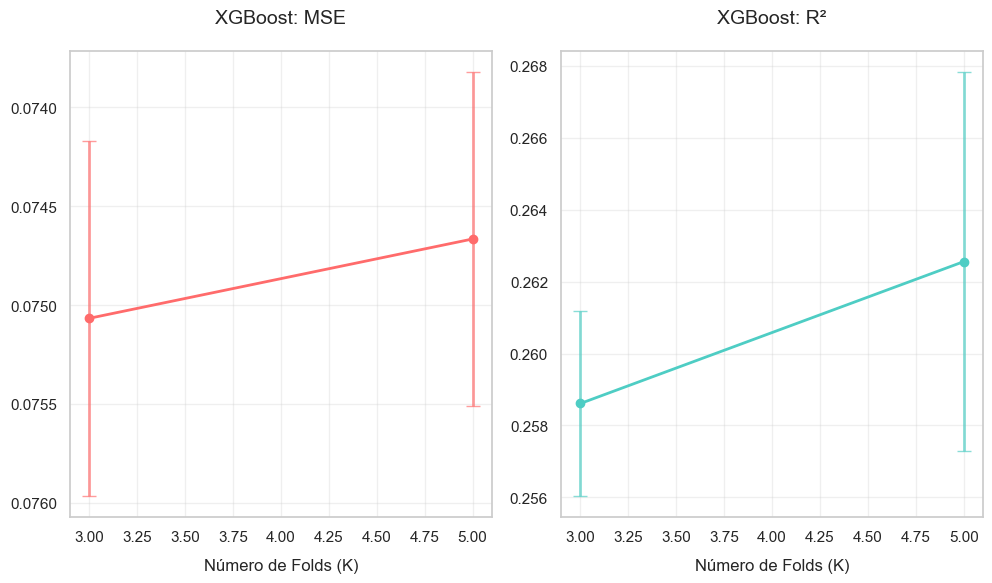

In [77]:
for i in range(len(models)):
    plt.figure(figsize=(15, 6))
    metrics = {
        'mse': {'color': '#FF6B6B', 'title': f'{modelNames[i]}: MSE'},
        'r2': {'color': '#4ECDC4', 'title': f'{modelNames[i]}: R²'},
    }

    for j, (metric, config) in enumerate(metrics.items(), 1):
        plt.subplot(1, 3, j)
        x = list(results[i][metric].keys())
        y = [results[i][metric][k]['mean'] for k in x]
        y_err = [results[i][metric][k]['std'] for k in x]

        plt.errorbar(x, y, yerr=y_err, fmt='-o', color=config['color'],
                    ecolor=config['color']+'AA', capsize=5, linewidth=2)

        plt.title(config['title'], pad=20, fontsize=14)
        plt.xlabel('Número de Folds (K)', labelpad=10)
        plt.grid(True, alpha=0.3)
        if metric != 'r2':
            plt.gca().invert_yaxis()  # Inverte para mostrar o melhor no topo

    plt.tight_layout()
    plt.show()